# **LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical


X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)


y_train = y_train.values - 1
y_test = y_test.values - 1
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


<ipython-input-14-7d50f2196413>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-14-7d50f2196413>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
<ipython-input-14-7d50f2196413>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
<ipython-input-14-7d50f2196413>:11: FutureWarning: The 'delim_w

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │         353,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403,078 (1.54 MB)

 Trainable params: 403,078 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1 = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7348 - loss: 0.9886 - val_accuracy: 0.9155 - val_loss: 0.2084
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9594 - loss: 0.1265 - val_accuracy: 0.9406 - val_loss: 0.1638
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9710 - loss: 0.0823 - val_accuracy: 0.9399 - val_loss: 0.1743
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9786 - loss: 0.0626 - val_accuracy: 0.9447 - val_loss: 0.1653
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9821 - loss: 0.0476 - val_accuracy: 0.9413 - val_loss: 0.1715
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9793 - loss: 0.0536 - val_accuracy: 0.9423 - val_loss: 0.1777
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9815 - loss: 0.0485 - val_accuracy: 0.9447 - val_loss: 0.1933
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9863 - loss: 0.0354 - val_accur

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.1717
Test Accuracy: 94.74%
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       496
           1       0.91      0.98      0.94       471
           2       0.97      0.91      0.94       420
           3       0.94      0.91      0.93       491
           4       0.90      0.94      0.92       532
           5       1.00      0.97      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



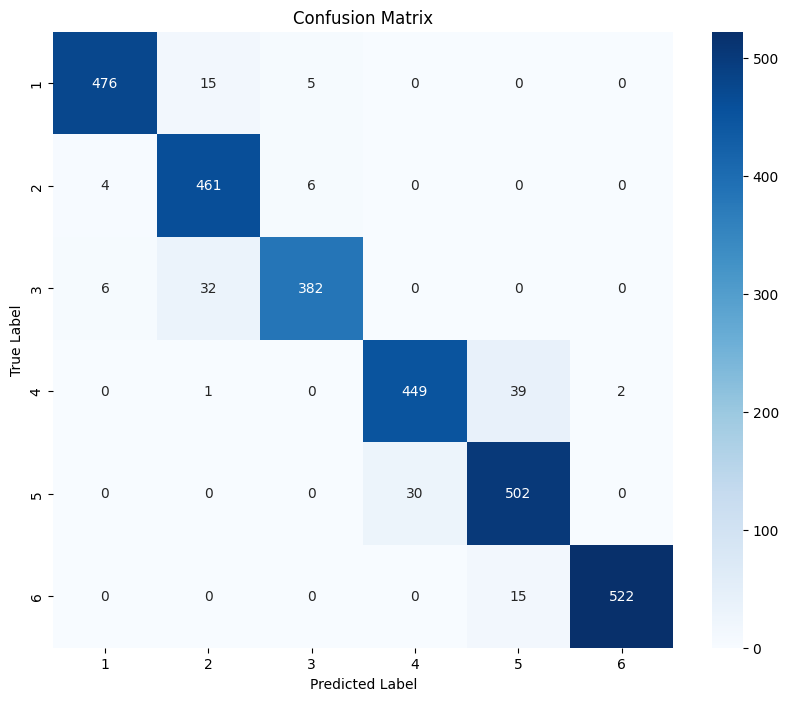

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Changing batch size from 64 to **32**

In [ ]:
model2 = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7641 - loss: 0.7886 - val_accuracy: 0.9423 - val_loss: 0.1617
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9635 - loss: 0.1083 - val_accuracy: 0.9332 - val_loss: 0.1752
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9704 - loss: 0.0757 - val_accuracy: 0.9287 - val_loss: 0.2120
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9770 - loss: 0.0641 - val_accuracy: 0.9464 - val_loss: 0.1606
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9774 - loss: 0.0620 - val_accuracy: 0.9406 - val_loss: 0.1811
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9787 - loss: 0.0555 - val_accuracy: 0.9416 - val_loss: 0.1941
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9843 - loss: 0.0436 - val_accuracy: 0.9311 - val_loss: 0.2349
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9841 - loss: 0.0444 - val_accu

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2966
Test Accuracy: 93.48%
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       496
           1       0.94      0.95      0.95       471
           2       0.97      0.93      0.95       420
           3       0.97      0.80      0.88       491
           4       0.82      0.98      0.89       532
           5       1.00      0.96      0.98       537

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.93      0.93      2947



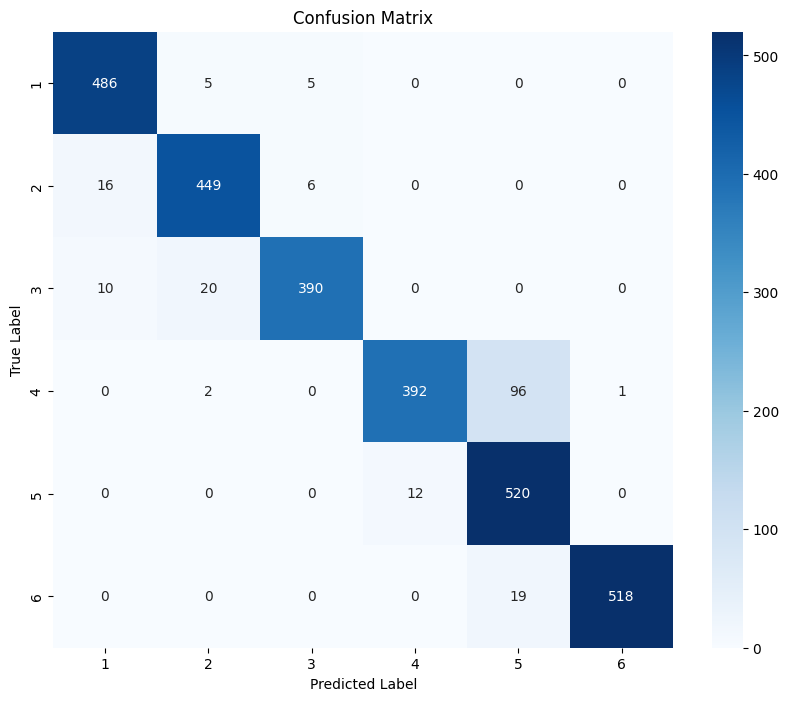

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# batch size is chaged to 128

In [ ]:
model3= model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_data=(X_test_scaled, y_test))


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9946 - loss: 0.0122 - val_accuracy: 0.9454 - val_loss: 0.2240
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accuracy: 0.9433 - val_loss: 0.2371
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9444 - val_loss: 0.2376
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9488 - val_loss: 0.2175
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9968 - loss: 0.0075 - val_accuracy: 0.9494 - val_loss: 0.2143
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9477 - val_loss: 0.2242
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9477 - val_loss: 0.2314
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9481 - v

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9418 - loss: 0.2709
Test Accuracy: 94.30%
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       496
           1       0.93      0.95      0.94       471
           2       0.98      0.90      0.94       420
           3       0.95      0.88      0.91       491
           4       0.88      0.95      0.91       532
           5       1.00      0.97      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



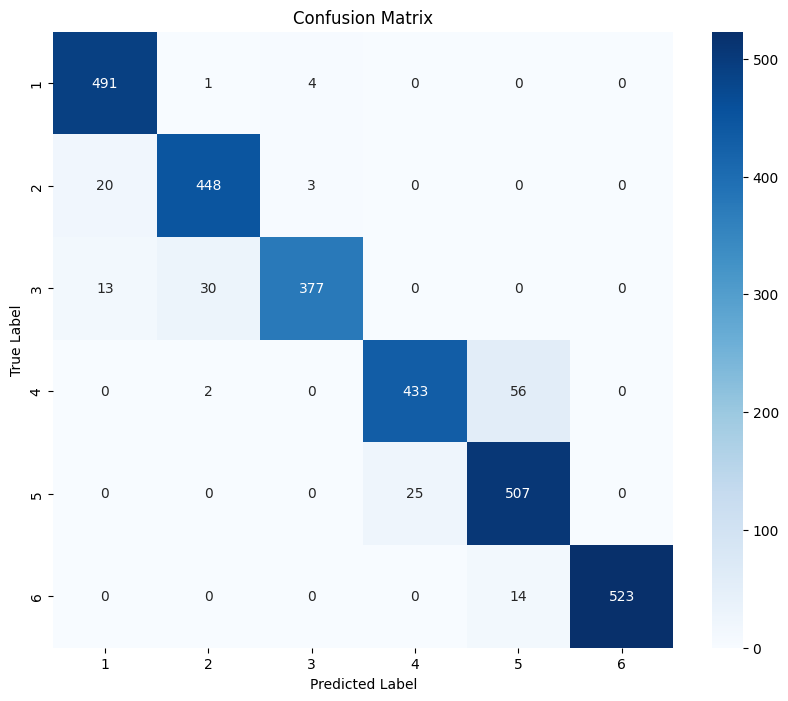

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# RMSPROP As OPTIMISER

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │         353,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403,078 (1.54 MB)

 Trainable params: 403,078 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4 = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9899 - loss: 0.0244 - val_accuracy: 0.9430 - val_loss: 0.2150
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9450 - val_loss: 0.2289
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9933 - loss: 0.0170 - val_accuracy: 0.9454 - val_loss: 0.2395
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9943 - loss: 0.0158 - val_accuracy: 0.9270 - val_loss: 0.3437
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9430 - val_loss: 0.2668
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9949 - loss: 0.0134 - val_accuracy: 0.9430 - val_loss: 0.2721
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9454 - val_loss: 0.2301
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accu

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.2141
Test Accuracy: 94.20%
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.94      0.96      0.95       471
           2       0.97      0.92      0.94       420
           3       0.88      0.94      0.91       491
           4       0.91      0.88      0.90       532
           5       1.00      0.97      0.98       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



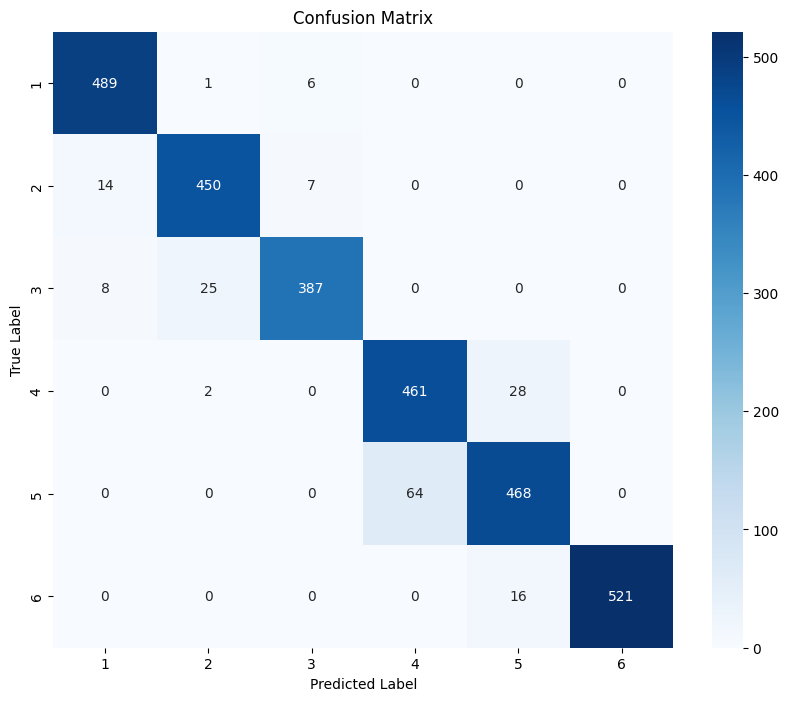

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()